In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [2]:
Train_data = "training_set"
Test_data = "test_set"
IMG_SIZE = 150
BATCH_SIZE = 32

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                      

Epoch 1/20
251/251 [==============================] - 946s 4s/step - loss: 0.8224 - accuracy: 0.6227 - val_loss: 0.6686 - val_accuracy: 0.5566
Epoch 2/20
251/251 [==============================] - 581s 2s/step - loss: 0.5933 - accuracy: 0.6983 - val_loss: 0.9731 - val_accuracy: 0.5571
Epoch 3/20
251/251 [==============================] - 574s 2s/step - loss: 0.5275 - accuracy: 0.7368 - val_loss: 0.5303 - val_accuracy: 0.7375
Epoch 4/20
251/251 [==============================] - 769s 3s/step - loss: 0.4815 - accuracy: 0.7688 - val_loss: 0.6551 - val_accuracy: 0.6915
Epoch 5/20
251/251 [==============================] - 638s 3s/step - loss: 0.4503 - accuracy: 0.7874 - val_loss: 0.6046 - val_accuracy: 0.7128
Epoch 6/20
251/251 [==============================] - 589s 2s/step - loss: 0.4283 - accuracy: 0.8027 - val_loss: 0.4406 - val_accuracy: 0.8028
Epoch 7/20
251/251 [==============================] - 583s 2s/step - loss: 0.4098 - accuracy: 0.8124 - val_loss: 0.4352 - val_accuracy: 0.8107

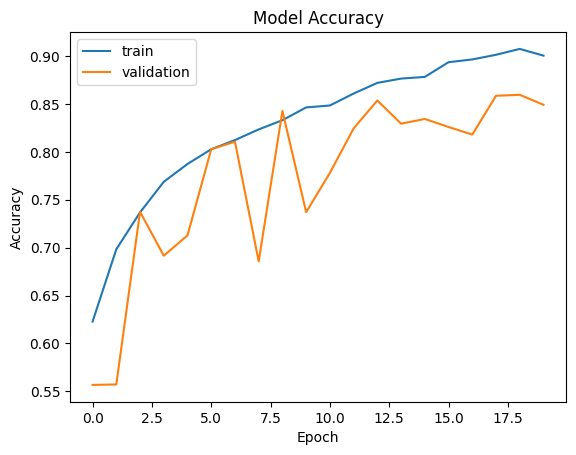

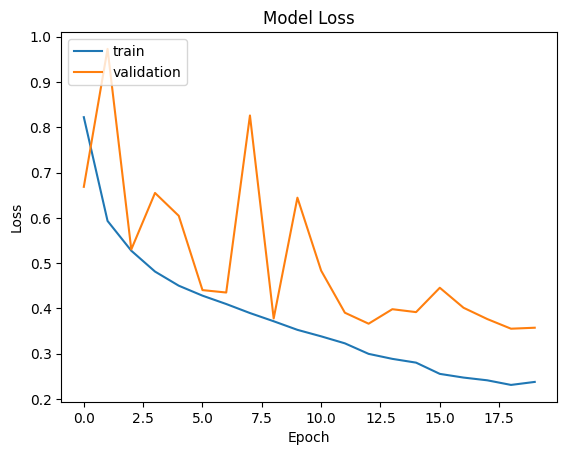

MemoryError: Unable to allocate 8.24 MiB for an array with shape (32, 150, 150, 3) and data type float32

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        Train_data,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        Test_data,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='binary')

train_data = train_generator
test_data = validation_generator

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.2),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
     Dense(1, activation='sigmoid')
])


model.summary()


model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])


history = model.fit(train_data,
                    steps_per_epoch=len(train_data),
                    epochs=20,
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    verbose=1)

model.save("cat_dog_classifier.h5")


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

loaded_model = tf.keras.models.load_model('cat_dog_classifier.h5')

test_images = []
test_labels = []
for image_batch, label_batch in test_data:
    for img, label in zip(image_batch, label_batch):
        test_images.append(img)
        test_labels.append(label)
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_predictions = loaded_model.predict(test_images)


with open('submission.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(["Id", "Predicted"])
    for i in range(len(test_predictions)):
        if test_predictions[i][0] > 0.5:
            writer.writerow([i+1, "Dog"])
        else:
            writer.writerow([i+1, "Cat"])